# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Load-lightcone" data-toc-modified-id="Load-lightcone-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load lightcone</a></div><div class="lev2 toc-item"><a href="#Add-missing-column-for-the-simulations" data-toc-modified-id="Add-missing-column-for-the-simulations-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Add missing column for the simulations</a></div><div class="lev1 toc-item"><a href="#Set-galaxy-parameters" data-toc-modified-id="Set-galaxy-parameters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Set galaxy parameters</a></div><div class="lev1 toc-item"><a href="#Set-survey-properties-and-header" data-toc-modified-id="Set-survey-properties-and-header-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Set survey properties and header</a></div><div class="lev1 toc-item"><a href="#Generate-HI-data-cube" data-toc-modified-id="Generate-HI-data-cube-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Generate HI data cube</a></div><div class="lev2 toc-item"><a href="#Generate-catalogue-of-spectra" data-toc-modified-id="Generate-catalogue-of-spectra-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generate catalogue of spectra</a></div><div class="lev3 toc-item"><a href="#Grid-spectra-to-data-cube" data-toc-modified-id="Grid-spectra-to-data-cube-411"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Grid spectra to data cube</a></div>

In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from astropy import units as u
from astropy.io import fits

from pyhis import surveys, galaxies, core, helpers
from pyhiframe.pyhiframe import HIConverter

In [16]:
from matplotlib import rcParams
rcParams['figure.figsize'] = (12, 6)

# Load lightcone

Load the lightcone, which should be a table format such as `pandas`. Right now, the required columns are R.A., Dec., redshift, and HI mass.

In [17]:
# lightcone = pd.read_csv('../data/processed/lightcones/BolshoiP_Bethermin_Mstar_z_0_1.csv')
lightcone = pd.read_csv('../simulations/new_api_test/lightcone.csv')

In [18]:
lightcone.head()

,ra,dec,z,mhalo,mstar,mhi,velo,distance,flux
0,0.962042,0.208673,0.010738,2.971386e+10,4995767.0,4.999924e+07,3201.888668,47.912961,0.092288
1,0.167535,0.041766,0.012947,1.439956e+10,5117198.0,1.285866e+07,3856.288706,57.865923,0.016272
2,0.084285,0.262463,0.015150,1.165678e+10,2646644.0,8.671741e+06,4507.455070,67.824432,0.007988
3,1.307007,0.818417,0.013167,9.371091e+09,1841140.0,5.729468e+06,3921.382025,58.858957,0.007008
4,1.024845,0.588583,0.015356,8.685398e+09,1678350.0,4.987321e+06,4568.270549,68.757301,0.004470


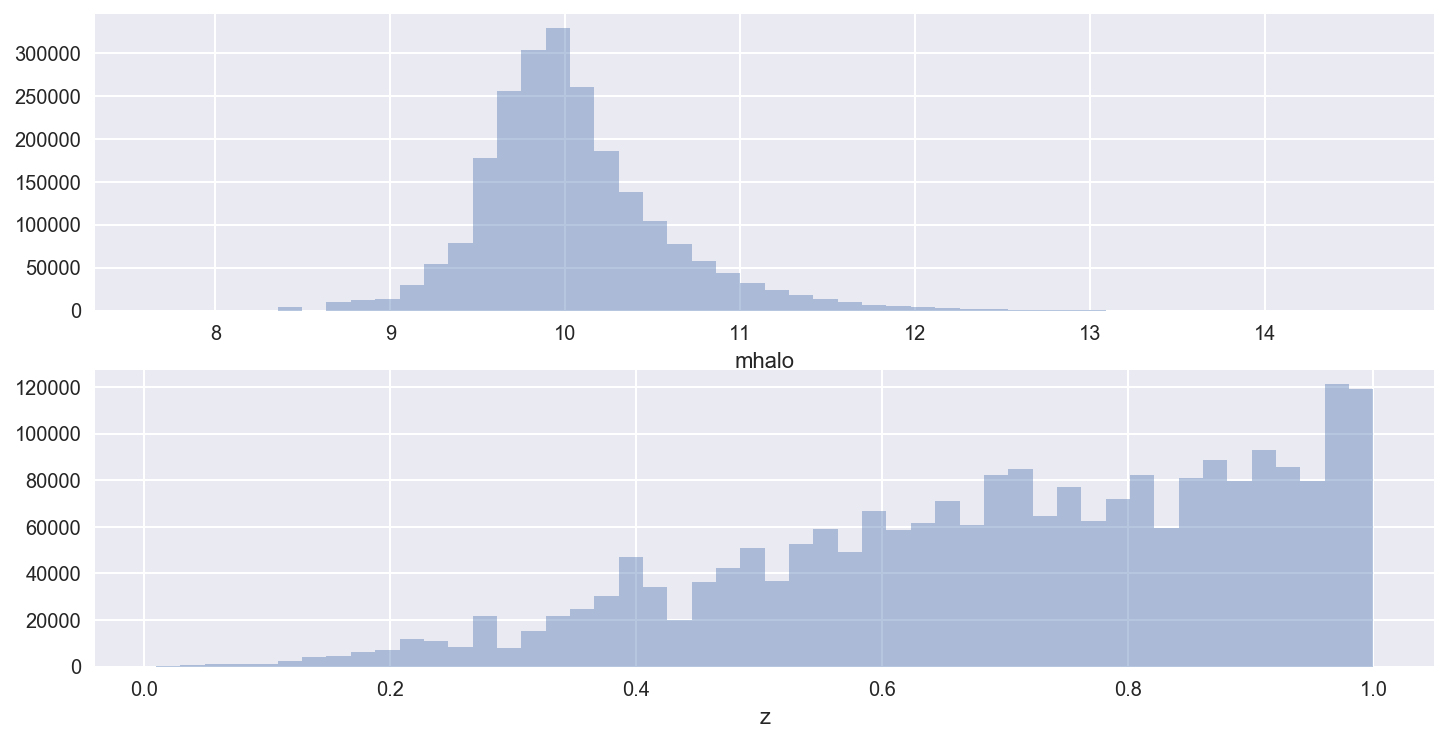

In [19]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
sns.distplot(np.log10(lightcone['mhalo']), kde=False, ax=ax1)
sns.distplot(lightcone['z'], kde=False, ax=ax2);

## Add missing column for the simulations

On top of the current column, we also require HI masses, radial velocities, distances, and HI fluxes.

In [9]:
lightcone = helpers.extend_lightcone(lightcone)

In [20]:
lightcone.head()

,ra,dec,z,mhalo,mstar,mhi,velo,distance,flux
0,0.962042,0.208673,0.010738,2.971386e+10,4995767.0,4.999924e+07,3201.888668,47.912961,0.092288
1,0.167535,0.041766,0.012947,1.439956e+10,5117198.0,1.285866e+07,3856.288706,57.865923,0.016272
2,0.084285,0.262463,0.015150,1.165678e+10,2646644.0,8.671741e+06,4507.455070,67.824432,0.007988
3,1.307007,0.818417,0.013167,9.371091e+09,1841140.0,5.729468e+06,3921.382025,58.858957,0.007008
4,1.024845,0.588583,0.015356,8.685398e+09,1678350.0,4.987321e+06,4568.270549,68.757301,0.004470


In [11]:
lightcone.to_csv('../simulations/new_api_test/lightcone.csv', index=False)

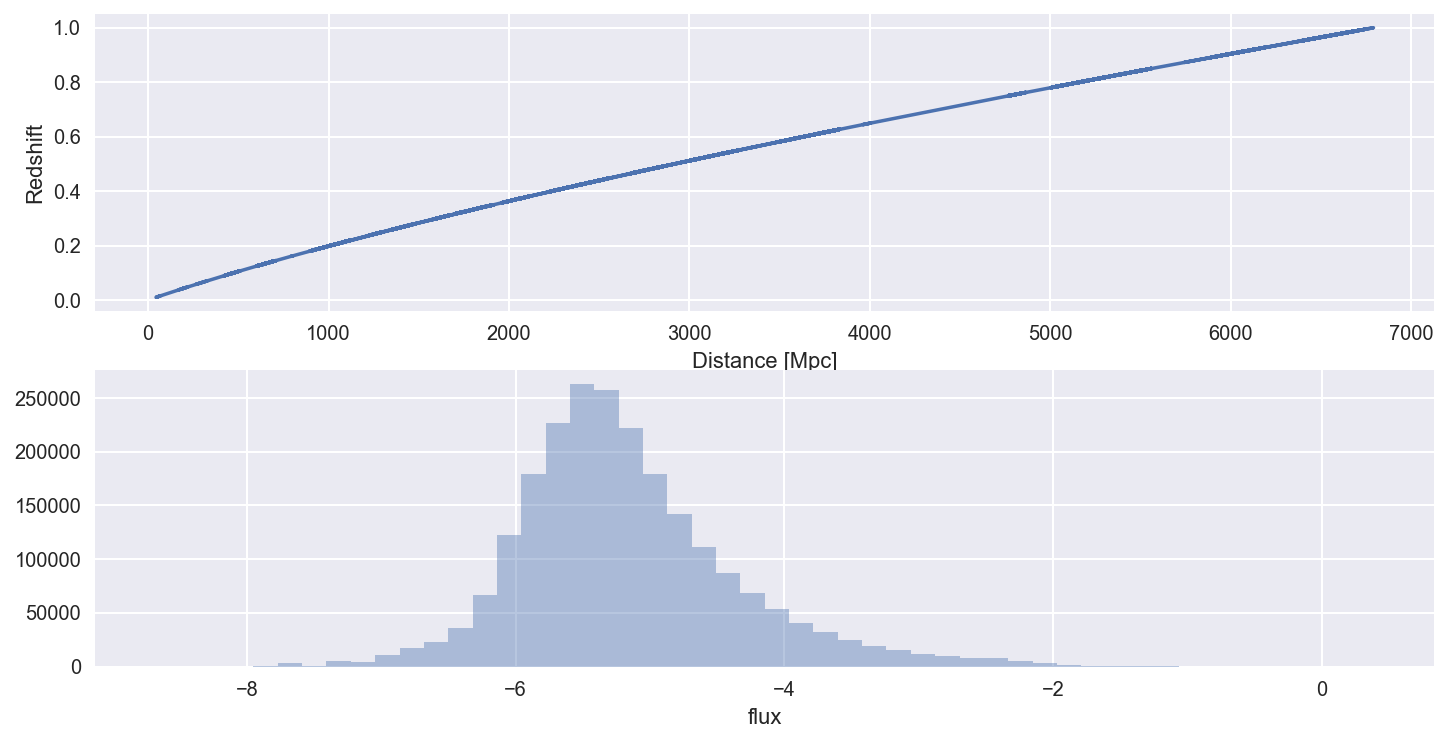

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=2)
ax1.plot(lightcone['distance'], lightcone['z'])
ax1.set_xlabel('Distance [Mpc]')
ax1.set_ylabel('Redshift')

sns.distplot(np.log10(lightcone['flux']), kde=False, ax=ax2);

# Set galaxy parameters

The galaxy shape parameters according to which HI is painted in the halos.

In [39]:
n_samples = 50000

In [40]:
galaxy = galaxies.Simple(n_samples)
# galaxy = galaxies.Stewart2014()

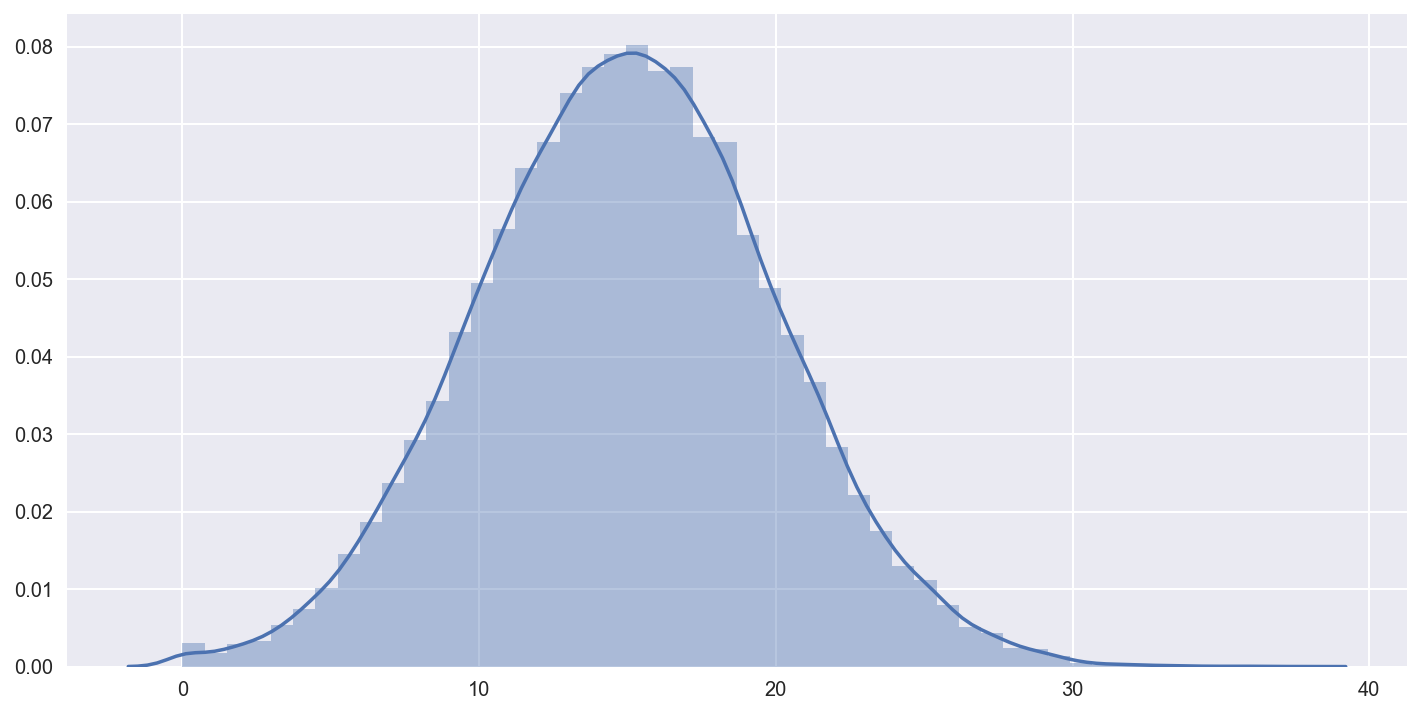

In [41]:
sns.distplot(galaxy.turb_velo)

# Set survey properties and header

In [45]:
survey = surveys.GbtType()
# surveyproperties, header = surveys.SKA_type()

In [46]:
vars(survey).keys()

dict_keys(['boxsize', 'fwhm', 'n_pixels', 'n_channels', 'z_min', 'z_max', 'z_grid', 'nu_max', 'nu_min', 'nu_grid', 'v_min', 'v_max', 'v_grid'])

In [47]:
survey.header

NAXIS   =                    3                                                  
BMAJ    =                 0.05                                                  
BMIN    =                 0.05                                                  
NAXIS1  =                  256                                                  
NAXIS2  =                  256                                                  
NAXIS3  =                 1024                                                  
CDELT1  = 0.005524271728019903                                                  
CDELT2  = 0.005524271728019903                                                  
CDELT3  =  -0.3084485993484805                                                  
CRPIX1  =                    0                                                  
CRPIX2  =                    0                                                  
CRPIX3  =                    0                                                  
CUNIT1  = 'deg     '        

# Generate HI data cube

## Generate catalogue of spectra

In [48]:
sample = lightcone.sample(n_samples)

spectra = core.generate_spectra(sample, survey, galaxy)

In [49]:
spectra.shape

(50000, 1024)

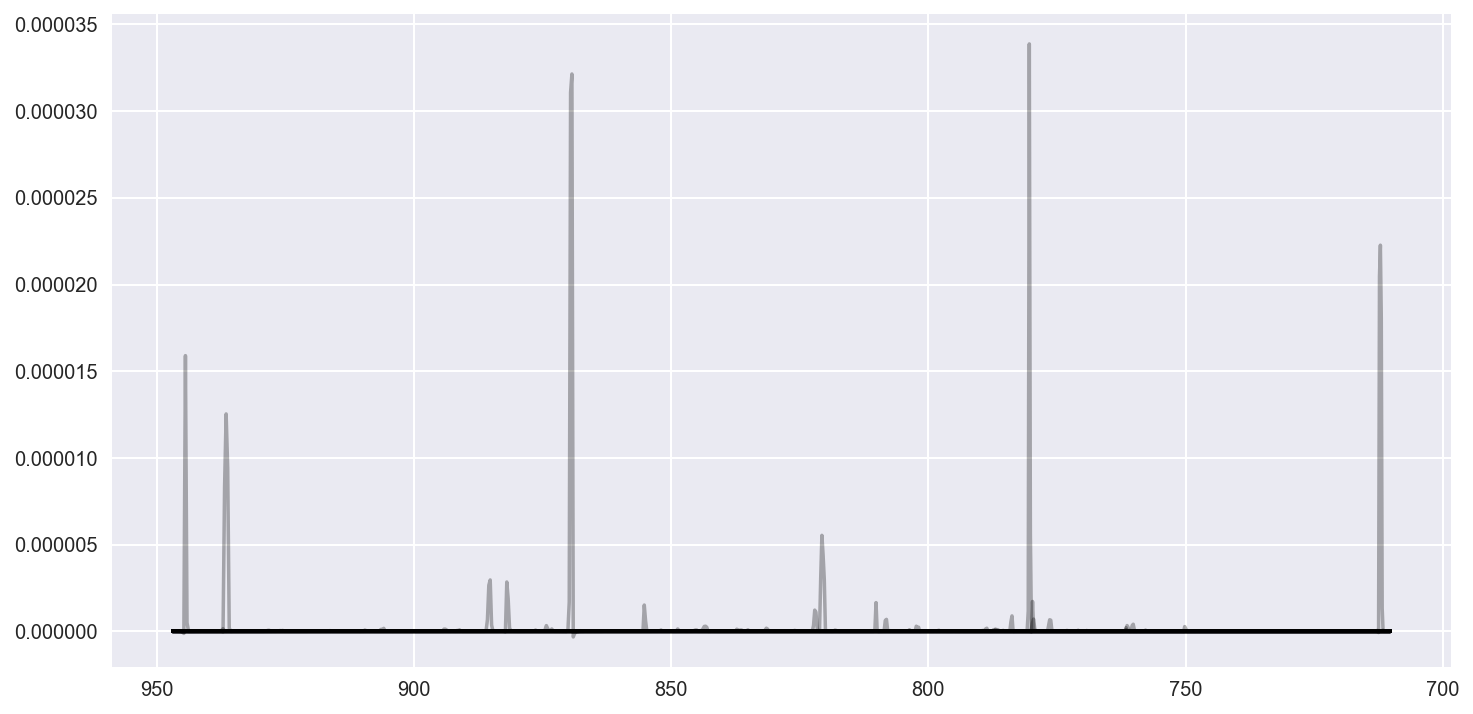

In [50]:
_ = [pl.plot(survey.nu_grid, spec, c='k', alpha=0.3) for spec in spectra[:120]]
pl.gca().invert_xaxis();

### Grid spectra to data cube

In [51]:
cube = core.generate_cube(spectra, survey.header, sample)

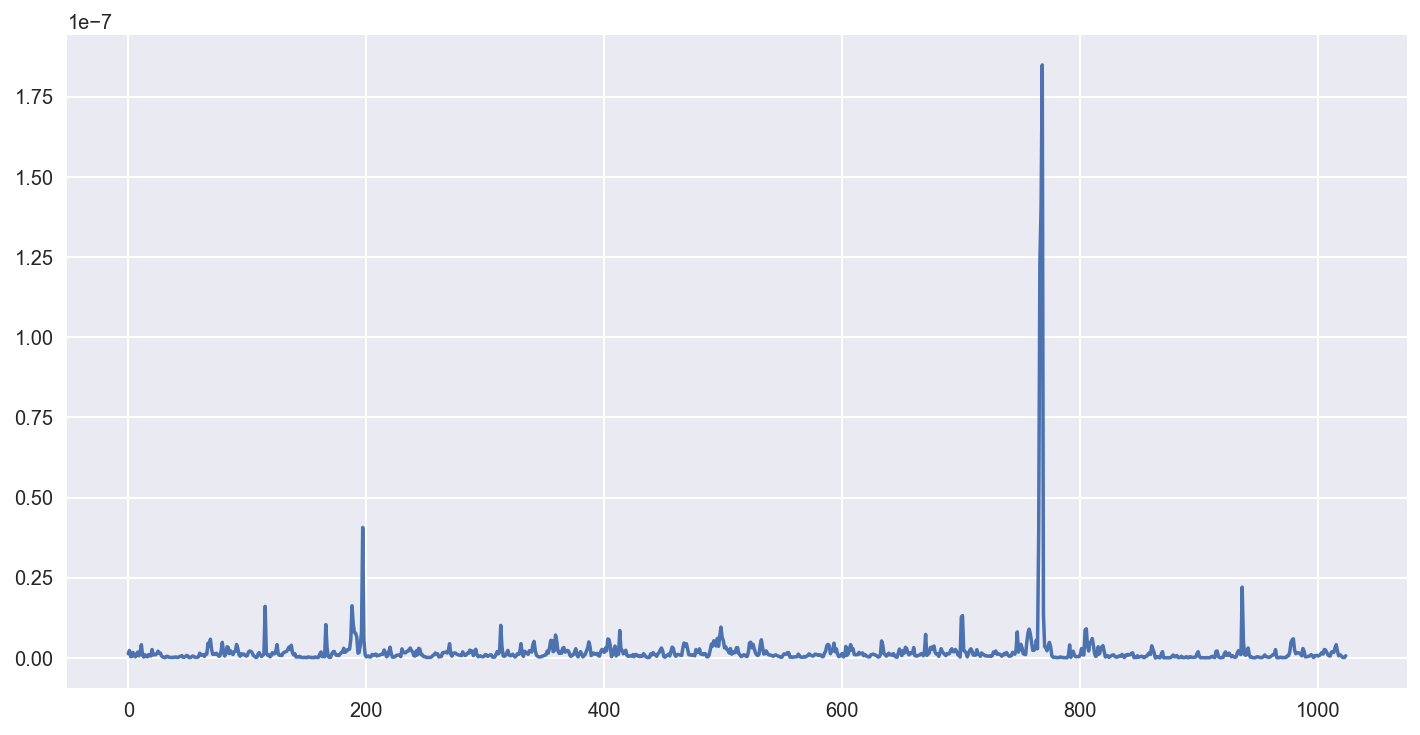

In [52]:
pl.plot(np.nanmean(cube, (1,2)))

In [53]:
fits.writeto('../simulations/new_api_test/datacube.fits', cube, survey.header, overwrite=True)